<h1>Boston 주택 가격 예측 모델</h1>

<h2>프로젝트 목표</h2>

1. Boston 주택 가격 예측 프로젝트를 성공적으로 완료하였는가?<br>
2. Reuters 데이터의 분류 프로젝트를 성공적으로 완료하였는가?<br>
3. CIFAR10 데이터의 분류 프로젝트를 성공적으로 완료하였는가?<br>

<h2>10-2. Boston 주택 가격 예측 모델</h2>

<h3>01.데이터 로드 및 전처리</h3>

· 먼저 데이터를 불러와 확인해 보고 전처리를 해봅시다

In [4]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


· 데이터셋의 전처리를 위해 표준화 작업을 수행해야합니다

In [6]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.

# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data -= mean
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

<h3>모델 구성 및 컴파일</h3>

·주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [9]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 회귀 모델의 경우, 활성화 함수를 사용하지 않음

model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error (평균 제곱 오차)를 사용하여 손실을 계산
              metrics=['mae'])  # 평균 절대 오차를 평가 지표로 사용


In [10]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)


Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 549.6174 - mae: 21.5590 - val_loss: 580.4220 - val_mae: 22.2225
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 462.7156 - mae: 19.3722 - val_loss: 472.6869 - val_mae: 19.6183
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 336.4361 - mae: 15.8346 - val_loss: 310.8722 - val_mae: 15.1620
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 184.4349 - mae: 10.9921 - val_loss: 167.1118 - val_mae: 10.0390
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 101.7340 - mae: 7.7814 - val_loss: 102.1516 - val_mae: 7.7717
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 69.7596 - mae: 6.2186 - val_loss: 71.7322 - val_mae: 6.4157
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 49.6713 - mae: 5.1321 - val_loss: 52.3542 - val_mae: 5.3665
Epoch 8/100
21/21 [==============================]

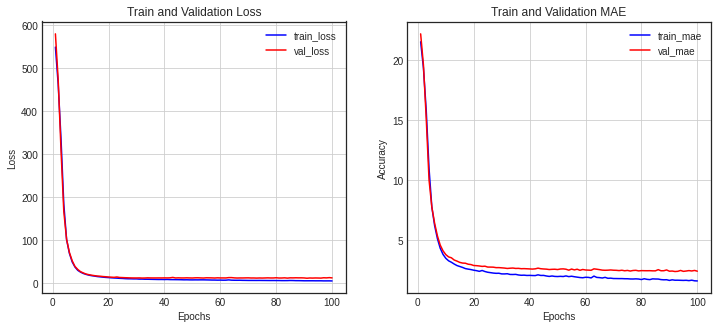

In [11]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<h3>모델 평가 및 예측</h3>

In [13]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)

print(f"평균 제곱 오차 (Test MSE): {test_loss}")
print(f"평균 절대 오차 (Test MAE): {test_mae}")


4/4 [==============================] - 0s 2ms/step - loss: 22.8070 - mae: 3.0141
평균 제곱 오차 (Test MSE): 22.807004928588867
평균 절대 오차 (Test MAE): 3.0140819549560547


<br>
<br>
<br>
<h2>10-3.Reuter 딥러닝 모델</h2>

<h3>데이터 로드 및 전처리</h3>

· reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000)<br>
· 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.<br>
· 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [17]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 데이터 분리: 훈련 데이터의 25%를 검증 데이터로 사용
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 출력
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))


6736
2246
2246
46


In [18]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터를 범주형 형태로 변환
one_hot_train_labels = to_categorical(train_labels)
one_hot_val_labels = to_categorical(val_labels)
one_hot_test_labels = to_categorical(test_labels)


<h3>모델 구성 및 컴파일</h3>

In [20]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))  # Dropout 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))  # 다중 분류 문제의 출력층

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 46)               

In [22]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint: 검증 손실이 좋아질 때마다 모델의 가중치를 저장하는 콜백
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')

# EarlyStopping: 검증 손실이 더 이상 좋아지지 않으면 학습을 조기 종료하는 콜백
early_stopping_cb = EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)

# 모델 훈련
history = model.fit(x_train, one_hot_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, one_hot_val_labels),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
53/53 [==============================] - 1s 14ms/step - loss: 3.0964 - accuracy: 0.3233 - val_loss: 3.1409 - val_accuracy: 0.5975
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 1.7714 - accuracy: 0.6293 - val_loss: 2.3190 - val_accuracy: 0.6812
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 1.3750 - accuracy: 0.7034 - val_loss: 1.7707 - val_accuracy: 0.7119
Epoch 4/100
53/53 [==============================] - 0s 9ms/step - loss: 1.1596 - accuracy: 0.7452 - val_loss: 1.4306 - val_accuracy: 0.7324
Epoch 5/100
53/53 [==============================] - 0s 7ms/step - loss: 1.0029 - accuracy: 0.7735 - val_loss: 1.2183 - val_accuracy: 0.7542
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.8982 - accuracy: 0.7911 - val_loss: 1.1148 - val_accuracy: 0.7622
Epoch 7/100
53/53 [==============================] - 0s 7ms/step - loss: 0.8264 - accuracy: 0.8060 - val_loss: 1.0429 - val_accuracy: 0.7827
Epoch 8/100


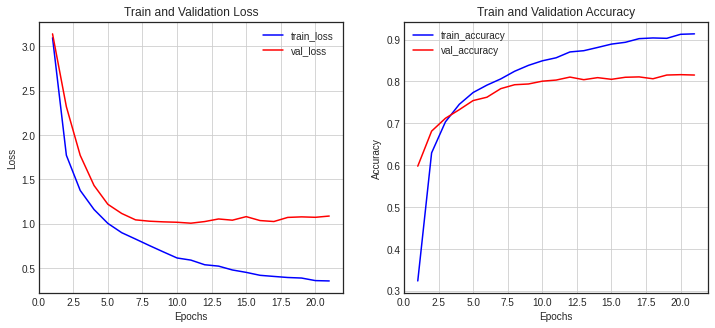

In [23]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [24]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test_labels)

print(f"테스트 손실: {test_loss}")
print(f"테스트 정확도: {test_accuracy}")


71/71 [==============================] - 0s 3ms/step - loss: 1.1184 - accuracy: 0.7769
테스트 손실: 1.1184221506118774
테스트 정확도: 0.7769367694854736


<br>
<br>
<br>
<h2>10-4. CIFAR10 딥러닝 모델</h2>

<h3>데이터 로드 및 전처리</h3>

· CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.<br>
· 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.<br>
· 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.<br>

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [28]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 데이터 분리: 훈련 데이터의 20%를 검증 데이터로 사용
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 이름을 담습니다

In [29]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

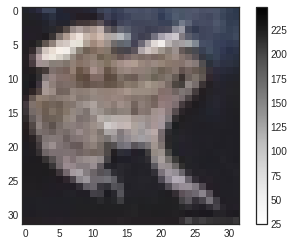

In [31]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [32]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [33]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# 데이터 변형: 32 * 32 * 3 = 3072
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [34]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

<h3>모델 구성 및 컴파일</h3>

In [35]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))  # Dropout 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 다중 분류 문제의 출력층

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 다중 분류 문제의 손실 함수
              metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

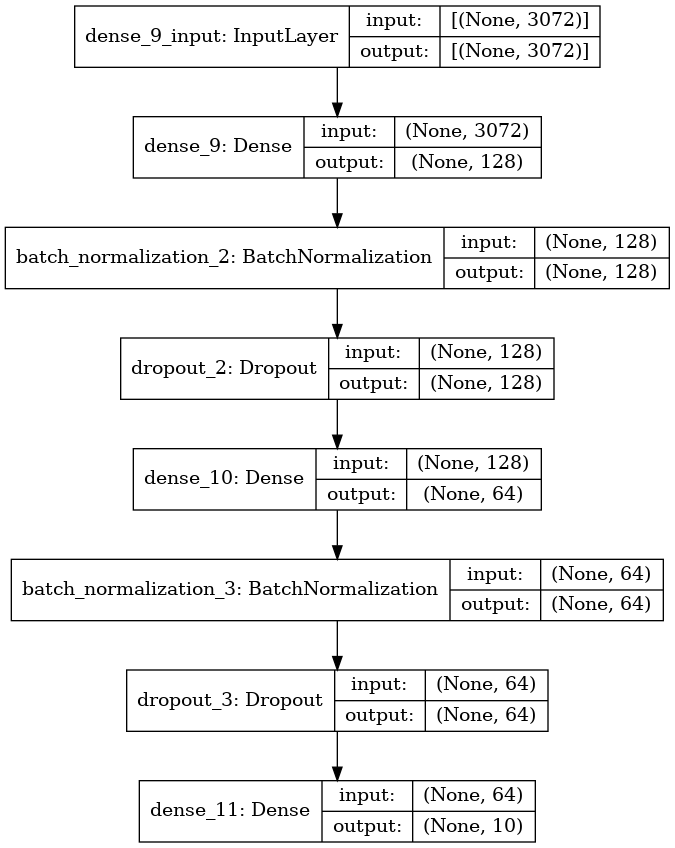

In [37]:
utils.plot_model(model, show_shapes=True)

<h3>모델 학습</h3>

In [38]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint: 검증 정확도가 좋아질 때마다 모델의 가중치를 저장하는 콜백
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')

# EarlyStopping: 검증 손실이 더 이상 좋아지지 않으면 학습을 조기 종료하는 콜백
early_stopping_cb = EarlyStopping(patience=10, monitor='val_loss', mode='min', restore_best_weights=True)

# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 2s 6ms/step - loss: 2.3721 - accuracy: 0.2268 - val_loss: 1.9471 - val_accuracy: 0.2850
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 1.9852 - accuracy: 0.2839 - val_loss: 1.9332 - val_accuracy: 0.2732
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9049 - accuracy: 0.3111 - val_loss: 1.8188 - val_accuracy: 0.3406
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8752 - accuracy: 0.3234 - val_loss: 1.7385 - val_accuracy: 0.3767
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8516 - accuracy: 0.3344 - val_loss: 1.7642 - val_accuracy: 0.3633
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8488 - accuracy: 0.3346 - val_loss: 1.7306 - val_accuracy: 0.3703
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8417 - accuracy: 0.3361 - val_loss: 1.7154 - val_accuracy: 0.3822

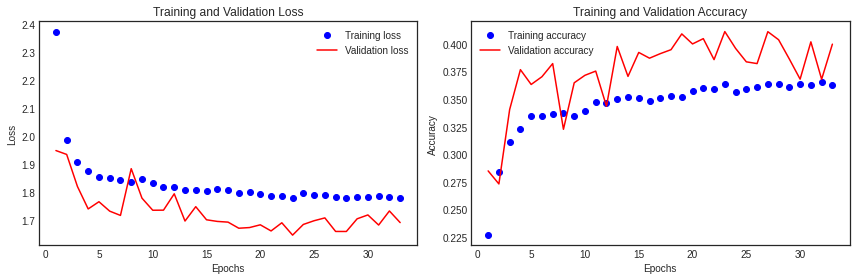

In [39]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 학습 히스토리에서 loss와 val_loss 추출
loss = history.history['loss']
val_loss = history.history['val_loss']

# 학습 히스토리에서 accuracy와 val_accuracy 추출
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# loss와 val_loss 시각화
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy와 val_accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<h3>모델 평가 및 예측</h3>

In [40]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6384 - accuracy: 0.4177


[1.6384429931640625, 0.41769999265670776]

<br>
<br>
<br>
<h2>회고</h2>

저번 프로젝트보다 훨씬 쉽고 따라하기 좋았습니다.
스쳐넘어갔던 것들을 하나하나 다시 짚어서 다시 코드를 썼던 것도 괜찮았습니다.
기초를 좀더 공부해서 그 바탕으로 더 심화 공부를 해봐야할 것 같습니다
